# Data Analysis on Global YouTube Statistics

# Import Required Libraries and Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("Global_YouTube_Statistics.csv", encoding="ISO-8859-1")

display(df.head())

display(df.info())

display(df.columns)

# Exploratory Data Analysis

In [6]:
display(df.describe(include='all').T)
display(df.isnull().sum())
display(df.duplicated().sum())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,995.0,NaN,NaN,NaN,498.0,287.37606,1.0,249.5,498.0,746.5,995.0
Youtuber,995,995,Make Joke Of,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscribers,995.0,NaN,NaN,NaN,22982412.060302,17526105.340936,12300000.0,14500000.0,17700000.0,24600000.0,245000000.0
video views,995.0,NaN,NaN,NaN,11039537052.038191,14110844376.829668,0.0,4288145410.0,7760819588.0,13554701853.0,228000000000.0
category,949,18,Entertainment,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,995,992,Like Nastya Vlog,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uploads,995.0,NaN,NaN,NaN,9187.125628,34151.352254,0.0,194.5,729.0,2667.5,301308.0
Country,873,49,United States,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbreviation,873,49,US,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_type,965,14,Entertainment,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

np.int64(0)

In [7]:
df = df.dropna()

In [8]:
dropped_features = [
    'Abbreviation', 'created_month', 'created_date', 'Latitude', 'Longitude'
]
df = df.drop(df[dropped_features], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   channel_type                             554 non-null    object 
 9   video_views_rank                         554 non-null    float64
 10  country_rank                             554 non-null  

# Correlation Between Numerical Features

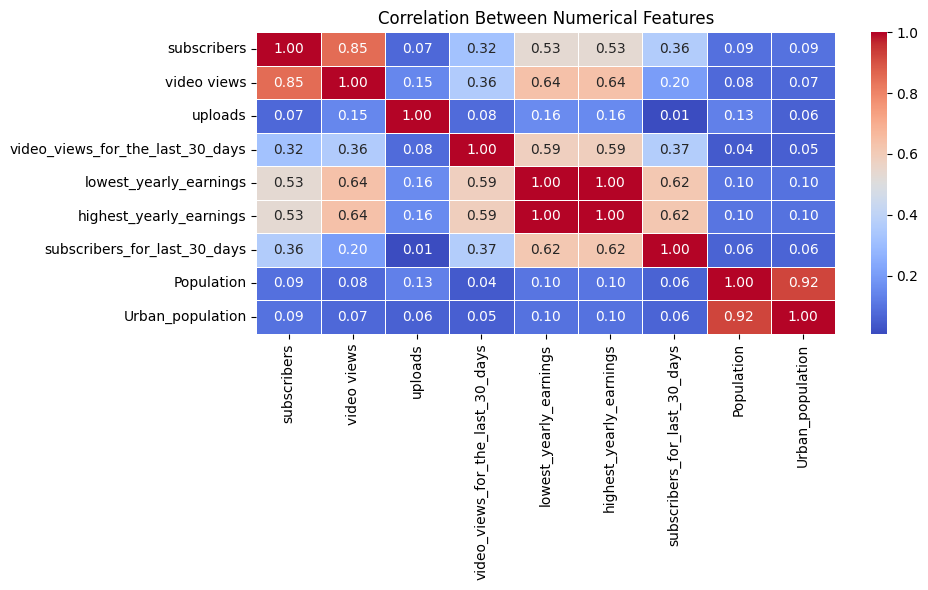

In [45]:
num_cols =  [
    'subscribers',
    'video views',
    'uploads',
    'video_views_for_the_last_30_days',
    'lowest_yearly_earnings',
    'highest_yearly_earnings',
    'subscribers_for_last_30_days',
    'Population',
    'Urban_population'
]
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()

Strong correlation (0.85) between subscribers and video views
Highest yearly earnings and lowest yearly earnings have a perfect correlation (1.00), suggesting they might be the same metric measured differently
Population and urban population are highly correlated (0.92), as expected
Uploads show very weak correlation with most metrics (0.07 with subscribers)
Recent activity metrics (subscribers/views for last 30 days) correlate moderately with earnings (0.62)

# Scatter Plot: Avg Yearly Earning vs Subscribers by Channel Type

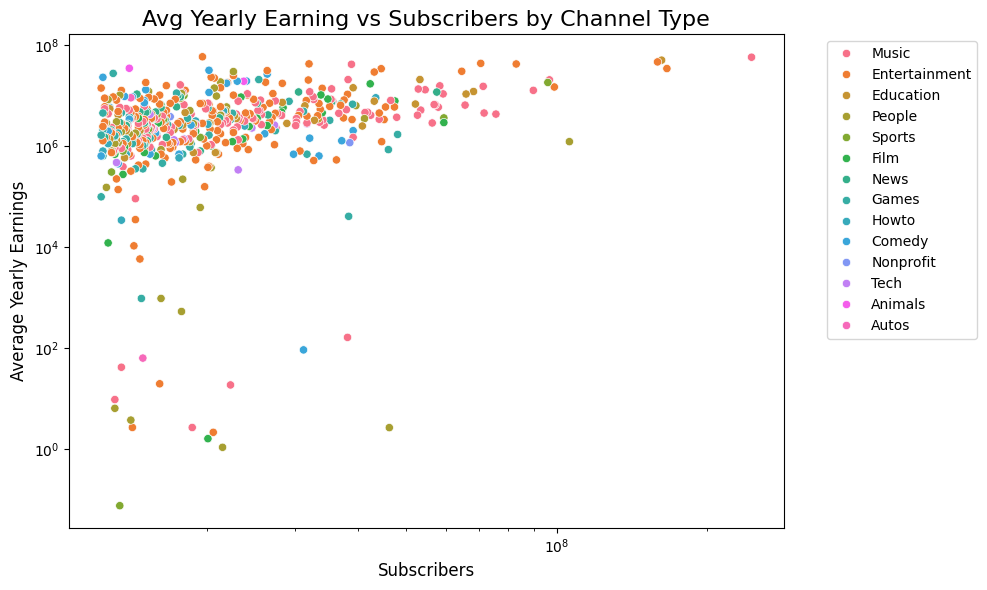

In [44]:
df['avg_yearly_earning'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2

plt.figure(figsize=(10, 6))  # width=12 inches, height=8 inches
sns.scatterplot(data=df, x='subscribers', y='avg_yearly_earning', hue='channel_type')
plt.title("Avg Yearly Earning vs Subscribers by Channel Type", fontsize=16)
plt.xlabel("Subscribers", fontsize=12)
plt.ylabel("Average Yearly Earnings", fontsize=12)
plt.xscale('log')  # for better visibility if data varies widely
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside plot
plt.tight_layout()
plt.show()

Log-scale chart shows most channels cluster between $10K-$1M earnings regardless of subscriber count
No clear linear relationship between subscriber count and earnings
Some outliers earn significantly less than expected for their subscriber counts
Entertainment channels appear frequently across all earning levels

# Top 10 YouTubers with the Greatest Subscriber Growth in Last 30 Days

In [25]:
top_growth = df[['Youtuber', 'subscribers_for_last_30_days']].dropna().sort_values(by='subscribers_for_last_30_days', ascending=False).head(10)
top_growth


,Youtuber,subscribers_for_last_30_days
2,MrBeast,8000000.0
417,DaFuq!?Boom!,6700000.0
117,Jess No Limit,5500000.0
0,T-Series,2000000.0
212,PANDA BOI,2000000.0
129,Ricis Official,1900000.0
323,Topper Guild,1900000.0
153,TheDonato,1900000.0
40,Infobells - Hindi,1600000.0
344,Ishaan Ali 11,1600000.0


# Top 10 Countries by YouTuber Count

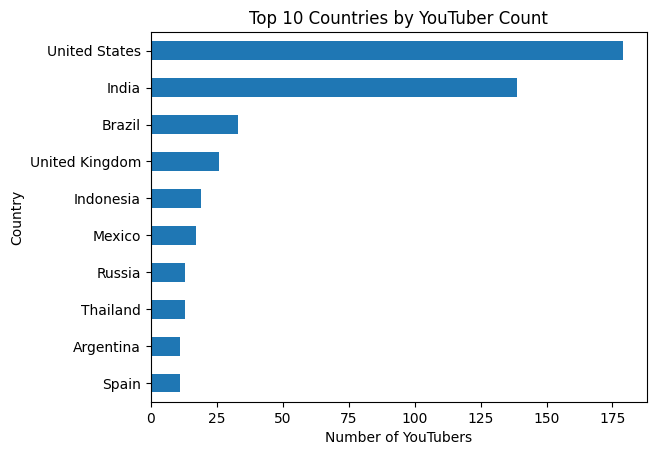

In [47]:
top_countries = df['Country'].value_counts().head(10).sort_values(ascending=True)
top_countries.plot(kind='barh', title='Top 10 Countries by YouTuber Count')
plt.xlabel("Number of YouTubers")
plt.show()

United States dominates with approximately 175 YouTubers
India is second with around 140 YouTubers
Significant drop to Brazil (around 40) and other countries
Top 10 countries represent diverse global regions (Americas, Europe, Asia)

# Top 10 YouTubers by Revenue Efficiency (Revenue per Subscriber)

In [27]:
df['revenue_per_sub'] = df['avg_yearly_earning'] / df['subscribers']
top_rev_eff = df[['Youtuber', 'revenue_per_sub']].dropna().sort_values(by='revenue_per_sub', ascending=False).head(10)
top_rev_eff


,Youtuber,revenue_per_sub
417,DaFuq!?Boom!,2.997449
798,ViralHog,2.485714
905,GH'S,2.119231
970,_vector_,1.858871
388,dednahype,1.571782
139,StarPlus,1.328125
310,LeoNata Family,1.323009
674,Chapitosiki,1.201987
212,PANDA BOI,1.183712
990,Natan por Aï¿,1.146341


# Average Yearly Earnings by Category

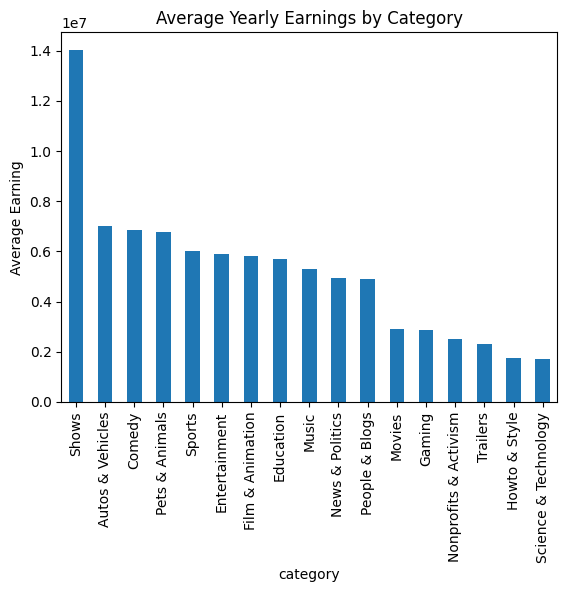

In [49]:
cat_rev = df.groupby('category')['avg_yearly_earning'].mean().sort_values(ascending=False)
cat_rev.plot(kind='bar', title='Average Yearly Earnings by Category')
plt.ylabel("Average Earning")
plt.show()


"Shows" category significantly outperforms all others (~$14M average)
"Autos & Vehicles," "Pets & Animals," and "Comedy" form the second tier (~$7M)
Science & Technology earns the least (~$2M)
Entertainment content falls in the middle range

# Top 10 Countries by Revenue Per Subscriber

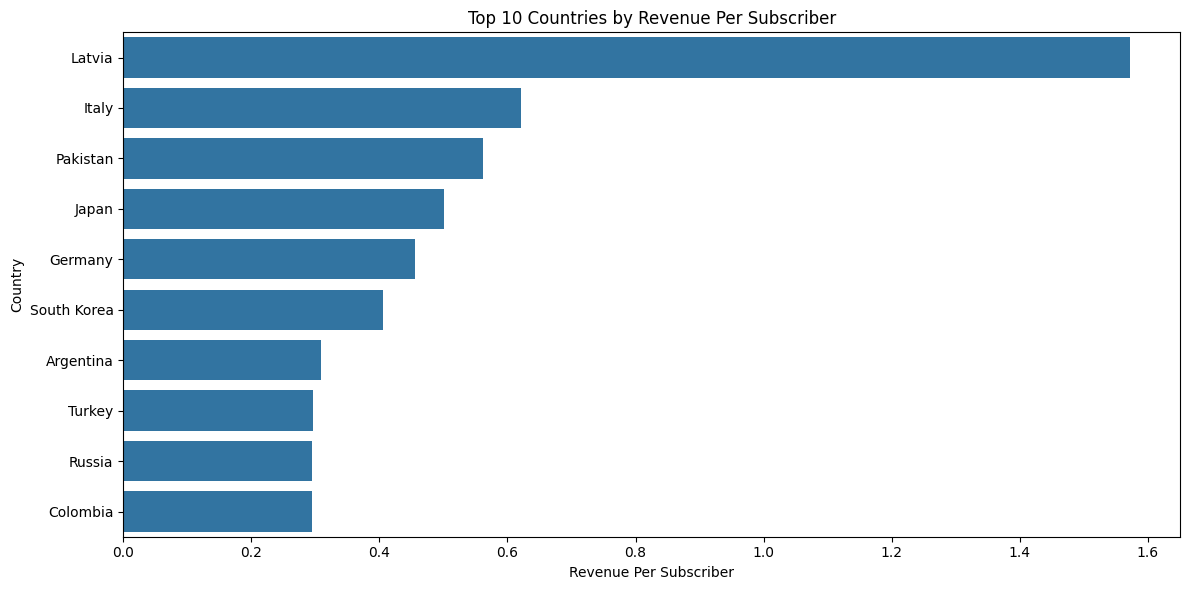

In [31]:
df['revenue_per_subscriber'] = df['avg_yearly_earning'] / df['subscribers']
country_avg = df.groupby('Country')['revenue_per_subscriber'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg.values, y=country_avg.index)
plt.title("Top 10 Countries by Revenue Per Subscriber")
plt.xlabel("Revenue Per Subscriber")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Latvia shows exceptionally high revenue per subscriber, nearly double any other country
Italy, Pakistan, and Japan follow with moderate revenue per subscriber
Suggests monetization effectiveness varies significantly by country

# Urban Population versus Uploads

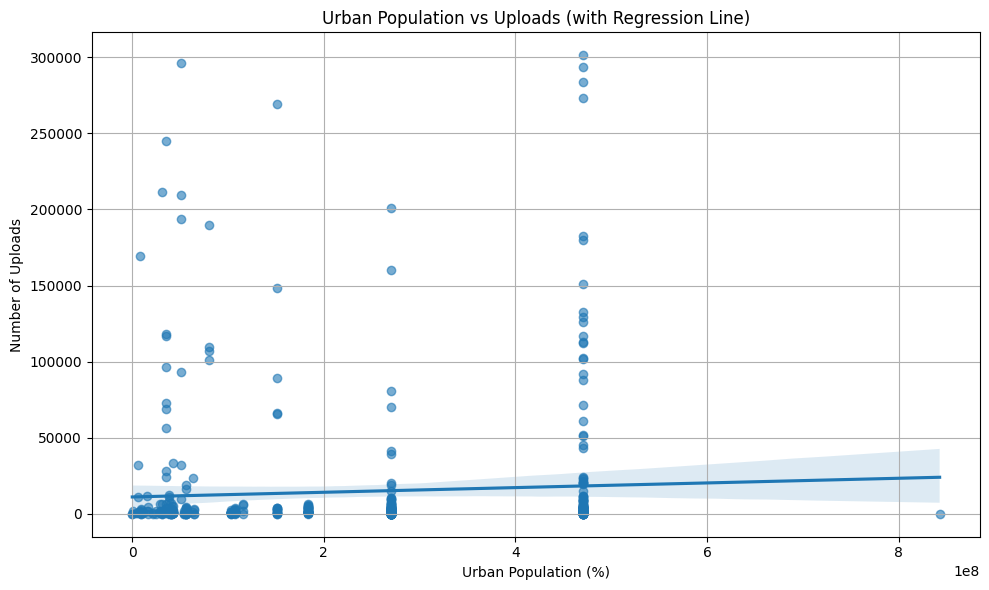

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Urban_population', y='uploads', scatter_kws={'alpha':0.6})
plt.title("Urban Population vs Uploads (with Regression Line)")
plt.xlabel("Urban Population (%)")
plt.ylabel("Number of Uploads")
plt.grid(True)
plt.tight_layout()
plt.show()


Weak positive correlation between urban population percentage and upload count
Significant variance in upload counts across all urban population levels
Several outliers with high upload counts regardless of urban population

# Unemployment Rate versus Recent Subscriber Growth

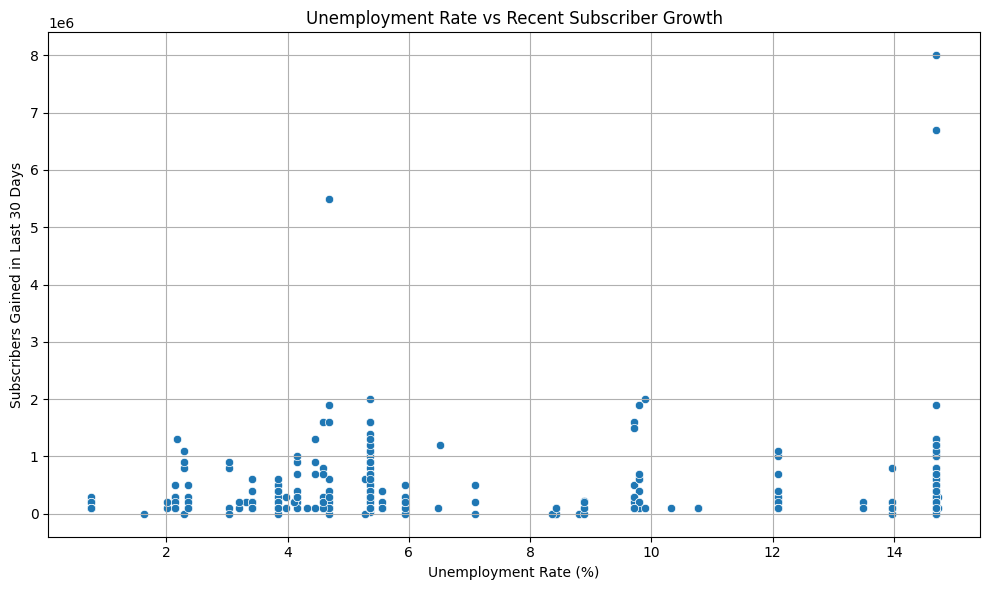

: 

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment rate', y='subscribers_for_last_30_days')
plt.title("Unemployment Rate vs Recent Subscriber Growth")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Subscribers Gained in Last 30 Days")
plt.grid(True)
plt.tight_layout()
plt.show()


Two major outliers at the higher unemployment range (14-15%) show exceptional subscriber growth (6-8 million)
Most channels experience modest growth (under 2 million subscribers) regardless of unemployment rate
There's no clear correlation between unemployment rates and subscriber growth
Subscriber growth appears somewhat scattered across unemployment rates of 4-10%
This suggests that economic conditions may not be a primary driver of YouTube channel growth

# Country Population versus Youtube Channel Subscribers

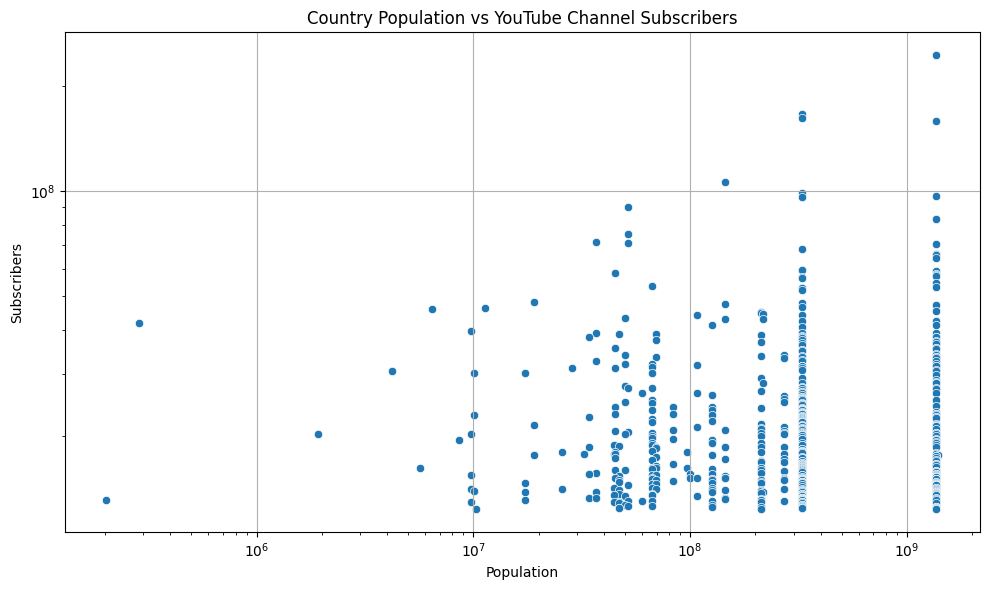

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='subscribers')
plt.title("Country Population vs YouTube Channel Subscribers")
plt.xlabel("Population")
plt.ylabel("Subscribers")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()


Log-scale chart shows subscriber count generally increases with country population
Largest countries (right side, likely India and China at ~1 billion+) have the highest subscriber counts
Significant variability exists, with some smaller countries having channels with high subscriber counts
Countries with similar populations can have vastly different subscriber numbers
This suggests that while population creates potential audience size, other factors (internet penetration, content preferences) influence actual subscriber numbers

# Education Enrolment versus Average yearly earnings

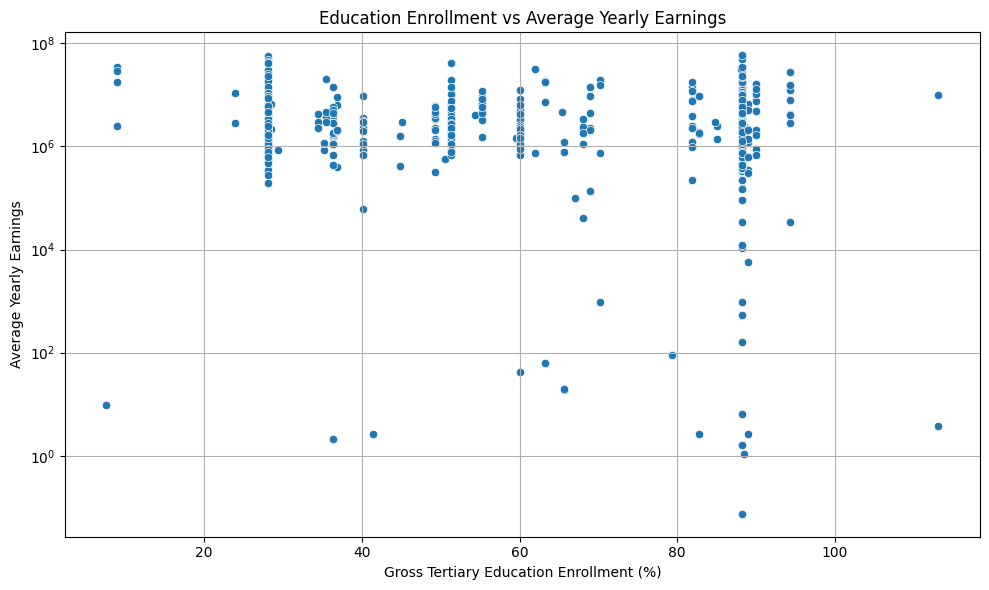

In [37]:
df['avg_yearly_earning'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gross tertiary education enrollment (%)', y='avg_yearly_earning')
plt.title("Education Enrollment vs Average Yearly Earnings")
plt.xlabel("Gross Tertiary Education Enrollment (%)")
plt.ylabel("Average Yearly Earnings")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()


No clear correlation between a country's tertiary education enrollment and YouTube earnings
Most earnings cluster between $100,000 and $10 million regardless of education rates
Some significant outliers show very low earnings (<$100) across various education levels
Countries with high education enrollment (80-100%) show the widest variance in earnings
This suggests that education levels alone don't predict YouTube success, and content quality/type likely matters more

Conclusion

Content Strategy: Focus on "Shows" format content where possible, as it generates significantly higher revenue than other categories.

Growth Metrics: Monitor subscriber and view growth together as they're highly correlated, but don't ignore upload frequency as a potential growth lever.

Regional Expansion: Consider targeting Latvia, Italy, and Pakistan for content expansion, as they show higher revenue per subscriber.

Quality over Quantity: The weak correlation between uploads and other metrics suggests focusing on quality content rather than high volume.

Category Selection: For new channels, "Shows," "Autos & Vehicles," and "Comedy" categories show the strongest earning potential.

Recent Activity Focus: The moderate correlation between 30-day metrics and earnings suggests maintaining consistent short-term engagement is important for revenue.

Target High Unemployment Regions Cautiously: While some extraordinary growth occurs in high unemployment areas, there's no consistent pattern. Focus on other factors for growth strategy.

Population Size Matters: Larger countries offer more potential viewers, but competition may be fierce. Consider targeting populous countries with relatively fewer established channels.

Educational Content Strategy: Educational attainment doesn't strongly predict earnings, suggesting educational content can succeed across various markets regardless of country-level education metrics.

Look Beyond Macroeconomic Indicators: The data suggests YouTube success depends more on content quality, niche selection, and marketing rather than broad economic or demographic factors.

Focus on Outlier Analysis: Investigate the specific channels/countries that show exceptional performance despite unfavorable metrics to identify unique success strategies.